# Loan Prediction

### Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("LoansTrainingSet.csv")
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [4]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [5]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [6]:
df.shape

(256984, 19)

In [7]:
df.sample(15)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
79413,4ed8a8fb-760e-4d5a-ac3d-e968ecfb4563,5070ad51-cfa4-4ca0-bd6a-e798bd81acc6,Fully Paid,27001,Short Term,NaN,1 year,Home Mortgage,NaN,Debt Consolidation,"$1,280.58",32.9,NaN,6,0,28355,38896,0.0,0.0
198622,c5947839-8b62-4857-82d9-e4c738c9cb28,55bd97c3-c53f-4da6-8c2f-f6f8baebfb9f,Charged Off,34759,Short Term,7200.0,8 years,Home Mortgage,83420.0,Debt Consolidation,"$2,280.16",39.6,61.0,16,0,19577,33295,0.0,0.0
242397,f158ca7e-baaa-4f02-a2b0-8c86d9d9fb88,723bc42d-656a-44cf-b51e-61b291912b8c,Fully Paid,11467,Short Term,722.0,1 year,Rent,36450.0,Debt Consolidation,$686.48,11.8,NaN,19,0,24807,31009,0.0,0.0
172179,ab2bb77e-a803-4d81-9c09-123fbb270783,04ff6db8-4c95-45ab-9c0f-75db6845cace,Fully Paid,99999999,Short Term,739.0,6 years,Rent,73224.0,Debt Consolidation,"$1,397.36",12.8,NaN,9,0,20909,27260,0.0,0.0
235791,ea9b2901-a147-4f2f-9276-3243fd66cdfe,56c6e303-239f-4402-9507-acaf9c4bea20,Fully Paid,4930,Short Term,704.0,10+ years,Home Mortgage,33521.0,Business Loan,$204.20,10.2,NaN,5,0,11003,13910,0.0,0.0
84428,53db136d-d3ae-4355-b743-4948c9131790,e0821792-45b7-4445-8955-2dad1a1777ff,Fully Paid,9833,Short Term,743.0,3 years,Home Mortgage,58998.0,Home Improvements,$151.43,12.5,NaN,13,0,4184,40230,0.0,0.0
240111,ef09e076-dede-4d28-8574-fd7d4f832419,1a68e902-8c65-4ea9-819e-08d41653dfc9,Fully Paid,7141,Short Term,733.0,2 years,Own Home,29258.0,Debt Consolidation,$150.92,9.7,NaN,13,0,5157,5749,0.0,0.0
176000,aef72861-b698-4cdb-b81c-95589aab544c,5a5dc876-b612-4c0d-98cc-22aaf9aea8d1,Fully Paid,1532,Short Term,NaN,NaN,Rent,NaN,Debt Consolidation,$85.80,26.4,45.0,4,1,1478,3605,1.0,0.0
23412,17662f56-d648-4a1d-907e-3669a16cb965,6d056e18-9df2-4fa6-b7ff-cb500939c2d3,Charged Off,8296,Short Term,709.0,5 years,Rent,42886.0,Debt Consolidation,$922.05,9.6,NaN,13,0,8258,16352,0.0,0.0
57540,39427a7b-2713-45ac-97b5-c31ac0a3485a,b9c95706-bcd0-4132-b0a2-3792e5298009,Charged Off,4728,Long Term,627.0,3 years,Own Home,48230.0,Business Loan,$256.03,8.6,16.0,4,0,0,0,0.0,0.0


In [8]:
#Loan ID
df = df.drop("Loan ID", axis=1)

In [9]:
#Customer ID
df = df.drop("Customer ID", axis=1)

In [10]:
#Purpose
df = df.drop("Purpose", axis = 1)

In [11]:
#Loan Status
df["Loan Status"].value_counts()
df["Loan Status"] = df["Loan Status"].replace({"Fully Paid" : 1, "Charged Off" : 0})

In [12]:
#Current Loan Amount
df['Current Loan Amount'].value_counts()

99999999    35210
9820           59
9793           58
10132          56
10025          54
            ...  
26821           1
21333           1
1235            1
18028           1
17940           1
Name: Current Loan Amount, Length: 27347, dtype: int64

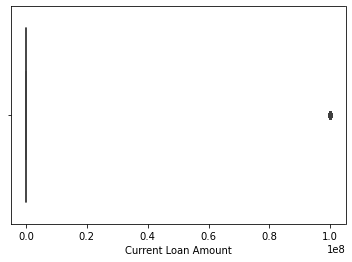

In [13]:
sns.boxplot(df['Current Loan Amount']);

In [14]:
df.corr()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Loan Status,1.000000,0.269804,-0.440307,0.070328,0.035548,0.023541,-0.020787,-0.010179,0.008838,0.001154,-0.012585
Current Loan Amount,0.269804,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.440307,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.070328,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.035548,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.023541,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.020787,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.010179,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.008838,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.001154,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160


In [15]:
df["Current Loan Amount"].sort_values(ascending=False)

77303     99999999
70150     99999999
210239    99999999
70106     99999999
70113     99999999
            ...   
68469          809
120918         768
80614          701
32912          511
180244         505
Name: Current Loan Amount, Length: 256984, dtype: int64

In [16]:
df[df["Current Loan Amount"] == 99999999]

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10,1,99999999,Short Term,742.0,3 years,Home Mortgage,64760.0,$582.84,26.8,NaN,11,0,8880,22711,0.0,0.0
16,1,99999999,Short Term,744.0,6 years,Home Mortgage,65605.0,$984.07,21.0,NaN,5,1,11514,17262,1.0,0.0
23,1,99999999,Short Term,745.0,10+ years,Rent,39476.0,$483.58,15.4,79.0,12,0,4636,21171,0.0,0.0
28,1,99999999,Short Term,724.0,1 year,Own Home,34297.0,$777.38,13.6,2.0,12,0,6720,53335,0.0,0.0
42,1,99999999,Short Term,750.0,10+ years,Own Home,86785.0,$56.41,22.0,NaN,7,0,3959,63862,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256938,1,99999999,Short Term,663.0,8 years,Home Mortgage,108482.0,"$1,365.07",20.3,NaN,13,0,17264,23174,0.0,0.0
256953,1,99999999,Short Term,698.0,7 years,Rent,65941.0,"$1,364.97",21.5,NaN,16,0,19104,23556,0.0,0.0
256954,1,99999999,Short Term,742.0,10+ years,Rent,118128.0,"$2,608.66",17.0,NaN,17,0,35089,55520,0.0,0.0
256963,1,99999999,Short Term,738.0,10+ years,Rent,34749.0,$833.98,11.0,25.0,17,0,3146,16050,0.0,0.0


In [17]:
df['Current Loan Amount']=df['Current Loan Amount'].astype('str')
df['Current Loan Amount'] = df['Current Loan Amount'].str.replace('99999999', '0').astype('int')

In [18]:
df["Current Loan Amount"].sort_values(ascending=False)

175021    41000
236456    39304
114356    37540
75775     35875
85968     35875
          ...  
66444         0
29350         0
29341         0
222792        0
154231        0
Name: Current Loan Amount, Length: 256984, dtype: int32

In [19]:
#Term
df["Term"].nunique()

2

In [20]:
df["Term"].unique()

array(['Short Term', 'Long Term'], dtype=object)

<AxesSubplot:xlabel='Credit Score'>

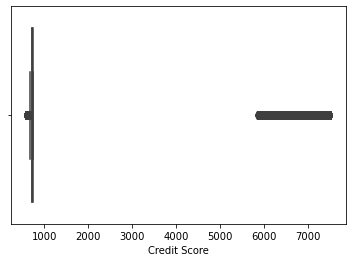

In [21]:
#Credit Score
sns.boxplot(df["Credit Score"])

In [22]:
df["Credit Score"].sample(20)

52165     7470.0
205000     730.0
186041     721.0
168072     736.0
191024       NaN
188596       NaN
20675      734.0
193755     747.0
190805     737.0
243275       NaN
205875     711.0
195559       NaN
173239     709.0
212845     721.0
219198     687.0
110335     733.0
56868      697.0
135765     736.0
127116       NaN
51014      713.0
Name: Credit Score, dtype: float64

In [23]:
"""
ABD'de kredi skoru 500-850 arasında değişiyor
deneysel
a = df[df['Credit Score'] > 1000]
a = (a["Credit Score"]/10)

a.head()
"""

'\nABD\'de kredi skoru 500-850 arasında değişiyor\ndeneysel\na = df[df[\'Credit Score\'] > 1000]\na = (a["Credit Score"]/10)\n\na.head()\n'

In [24]:
def div(value):
    if value >= 1000:
        value /= 10
    return value

df["Credit Score"] = df.loc[:,'Credit Score'].apply(lambda row: div(row))

In [25]:
df["Credit Score"].fillna(df["Credit Score"].mean(), inplace = True)

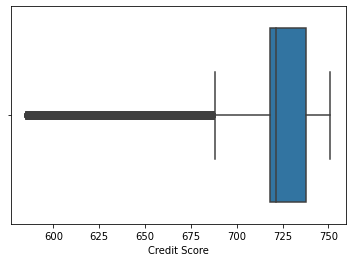

In [26]:
sns.boxplot(df["Credit Score"]);

In [27]:
df["Credit Score"].isnull().sum()

0

In [28]:
#Years in current job
df["Years in current job"].value_counts()

10+ years    78896
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
9 years       9932
Name: Years in current job, dtype: int64

In [29]:
df = df.replace({"10+ years":11,"2 years":2,"< 1 year":0.5, "3 years":3,"5 years":5,"1 year":1,"4 years":4,"6 years":6,"7 years":7,"8 years":8,"9 years":9})
df["Years in current job"].head()

0    11.0
1     4.0
2    11.0
3    11.0
4     4.0
Name: Years in current job, dtype: float64

In [30]:
df.isnull().sum()

Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [31]:
df["Years in current job"].mode()
df["Years in current job"].mode()[0]
df["Years in current job"].fillna(df["Years in current job"].mode()[0], inplace = True)

In [32]:
df["Years in current job"].isnull().sum()
df["Years in current job"].mean()

6.446405223671513

In [33]:
#Home Ownership
df["Home Ownership"].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [34]:
df["Home Ownership"].value_counts()

Home Mortgage    124477
Rent             109010
Own Home          22923
HaveMortgage        574
Name: Home Ownership, dtype: int64

In [35]:
df['Home Ownership'] = df['Home Ownership'].str.replace('HaveMortgage','Home Mortgage')

In [36]:
df['Home Ownership'].value_counts()

Home Mortgage    125051
Rent             109010
Own Home          22923
Name: Home Ownership, dtype: int64

In [37]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520,Short Term,741.0,11.0,Home Mortgage,33694.0,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,1,21029,Short Term,747.0,11.0,Home Mortgage,90126.0,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,1,18743,Short Term,747.0,11.0,Own Home,38072.0,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,1,11731,Short Term,746.0,4.0,Rent,50025.0,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [38]:
#Annual Income
df["Annual Income"].value_counts()

60684.0     31
49630.0     30
61188.0     30
59646.0     30
61134.0     28
            ..
65276.0      1
254462.0     1
126888.0     1
98337.0      1
30854.0      1
Name: Annual Income, Length: 60558, dtype: int64

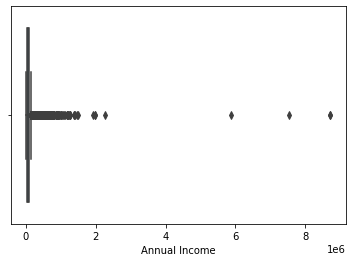

In [39]:
sns.boxplot(df["Annual Income"]);

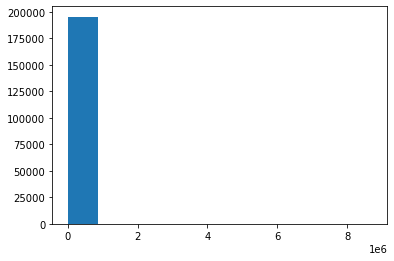

In [40]:
plt.hist(df["Annual Income"])
plt.show()

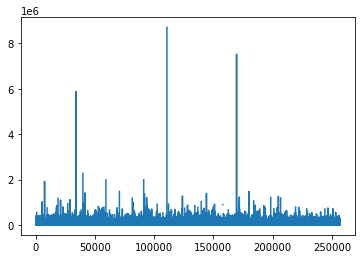

In [41]:
df["Annual Income"].plot.line();

In [42]:
df["Annual Income"].fillna(df["Annual Income"].mean(), inplace = True)

In [43]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520,Short Term,741.0,11.0,Home Mortgage,33694.0,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,1,21029,Short Term,747.0,11.0,Home Mortgage,90126.0,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,1,18743,Short Term,747.0,11.0,Own Home,38072.0,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,1,11731,Short Term,746.0,4.0,Rent,50025.0,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [44]:
df.isnull().sum()

Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job                 0
Home Ownership                       0
Annual Income                        0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [45]:
#Purpose


In [46]:
#Monthly Debt
df['Monthly Debt'] = df['Monthly Debt'].str.replace('$', '').str.replace(',', '').astype(float)

In [47]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520,Short Term,741.0,11.0,Home Mortgage,33694.0,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,1106.04,26.3,NaN,17,0,6262,19149,0.0,0.0
2,1,21029,Short Term,747.0,11.0,Home Mortgage,90126.0,1321.85,28.8,NaN,5,0,20967,28335,0.0,0.0
3,1,18743,Short Term,747.0,11.0,Own Home,38072.0,751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,1,11731,Short Term,746.0,4.0,Rent,50025.0,355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [48]:
#Years of Credit History

In [49]:
df["Years of Credit History"].value_counts()

16.0    3563
15.0    3379
17.0    3080
16.5    2963
14.0    2954
        ... 
52.8       1
54.6       1
3.7        1
65.8       1
60.7       1
Name: Years of Credit History, Length: 541, dtype: int64

In [50]:
df["Years of Credit History"].unique()

array([12.3, 26.3, 28.8, 26.2, 11.5, 13.2, 17.6, 17.7, 19.8, 26.8, 19.2,
        9.9, 21. , 18.8, 15. , 14.9, 17.8, 15.4, 30.3, 19.9, 14. , 29.6,
       13.6, 13.8, 15.5, 18. , 15.1, 16.2, 14.6, 27.2, 22. , 14.1, 26.1,
       23.1, 20.8, 28.6, 24.7, 23.6, 10.8,  8. , 18.4, 21.3, 14.3, 31.8,
       22.1, 25.2, 25.5, 16.5, 30. , 16.1, 20.4, 17.1, 10.2, 14.7,  7.8,
       30.5, 22.7, 12.5, 17.3, 10.9, 21.5, 14.8, 10.3, 27.4, 14.2, 17.4,
       21.4, 13.7, 19.5, 32.5, 44.5, 32. , 16.9, 19.4, 24.1, 23.4, 20.5,
       13.3, 16. , 19.6, 18.6, 16.3, 17.9, 32.4, 18.7, 23.3, 25. , 11.4,
       11.7, 21.9, 16.4, 16.8, 38.3, 21.2,  8.9, 27. , 38.5, 15.3, 25.9,
       15.9, 26.4, 19. , 17.2, 40.2,  6.6, 27.7, 23.5, 24.8, 29. , 26.7,
       11.8, 11. , 35.6, 10. ,  6.2, 19.3, 23. ,  6.9, 31.4, 13.5, 17. ,
       18.1, 34.6, 13. , 18.2, 25.1,  9.3, 29.4, 16.7, 23.8, 17.5, 16.6,
       15.7, 21.7, 18.5, 14.5, 22.4, 22.6, 15.6, 28.5,  9.6, 10.4,  9.5,
       20.9, 20.1, 15.8, 24.9, 20. , 24.4, 27.9,  8

In [51]:
df["Years of Credit History"] = df["Years of Credit History"].astype(int)

In [52]:
df["Years of Credit History"].unique()

array([12, 26, 28, 11, 13, 17, 19,  9, 21, 18, 15, 14, 30, 29, 16, 27, 22,
       23, 20, 24, 10,  8, 31, 25,  7, 32, 44, 38, 40,  6, 35, 34, 43, 41,
       36, 33,  5, 37, 47, 45,  4, 49, 50, 39, 42, 53, 51, 46,  3, 48, 52,
       55, 54, 60, 57, 56, 59, 62, 61, 58, 65, 64, 70, 66])

In [53]:
#Months since last delinquent (Son gecikmeden bu yana geçen aylar)
df["Months since last delinquent"]= df["Months since last delinquent"].fillna("0").astype(int)

In [54]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520,Short Term,741.0,11.0,Home Mortgage,33694.0,584.03,12,41,10,0,6760,16056,0.0,0.0
1,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,1106.04,26,0,17,0,6262,19149,0.0,0.0
2,1,21029,Short Term,747.0,11.0,Home Mortgage,90126.0,1321.85,28,0,5,0,20967,28335,0.0,0.0
3,1,18743,Short Term,747.0,11.0,Own Home,38072.0,751.92,26,0,9,0,22529,43915,0.0,0.0
4,1,11731,Short Term,746.0,4.0,Rent,50025.0,355.18,11,0,12,0,17391,37081,0.0,0.0


In [55]:
#Number of Open Accounts
df["Number of Open Accounts"].sort_values(ascending=False)

8842      76
245874    76
8843      76
245875    76
201049    58
          ..
181560     0
83806      0
83807      0
27651      0
181561     0
Name: Number of Open Accounts, Length: 256984, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256984 non-null  int64  
 1   Current Loan Amount           256984 non-null  int32  
 2   Term                          256984 non-null  object 
 3   Credit Score                  256984 non-null  float64
 4   Years in current job          256984 non-null  float64
 5   Home Ownership                256984 non-null  object 
 6   Annual Income                 256984 non-null  float64
 7   Monthly Debt                  256984 non-null  float64
 8   Years of Credit History       256984 non-null  int32  
 9   Months since last delinquent  256984 non-null  int32  
 10  Number of Open Accounts       256984 non-null  int64  
 11  Number of Credit Problems     256984 non-null  int64  
 12  Current Credit Balance        256984 non-nul

In [57]:
#Maximum Open Credit
df[df["Maximum Open Credit"] == "#VALUE!"]
df.loc[df["Maximum Open Credit"]== "#VALUE!","Maximum Open Credit" ] = "30000"

In [58]:
df['Maximum Open Credit']=df['Maximum Open Credit'].astype('int')

In [59]:
df.info() #meanini alamadım

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256984 non-null  int64  
 1   Current Loan Amount           256984 non-null  int32  
 2   Term                          256984 non-null  object 
 3   Credit Score                  256984 non-null  float64
 4   Years in current job          256984 non-null  float64
 5   Home Ownership                256984 non-null  object 
 6   Annual Income                 256984 non-null  float64
 7   Monthly Debt                  256984 non-null  float64
 8   Years of Credit History       256984 non-null  int32  
 9   Months since last delinquent  256984 non-null  int32  
 10  Number of Open Accounts       256984 non-null  int64  
 11  Number of Credit Problems     256984 non-null  int64  
 12  Current Credit Balance        256984 non-nul

In [60]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520,Short Term,741.0,11.0,Home Mortgage,33694.0,584.03,12,41,10,0,6760,16056,0.0,0.0
1,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,1106.04,26,0,17,0,6262,19149,0.0,0.0
2,1,21029,Short Term,747.0,11.0,Home Mortgage,90126.0,1321.85,28,0,5,0,20967,28335,0.0,0.0
3,1,18743,Short Term,747.0,11.0,Own Home,38072.0,751.92,26,0,9,0,22529,43915,0.0,0.0
4,1,11731,Short Term,746.0,4.0,Rent,50025.0,355.18,11,0,12,0,17391,37081,0.0,0.0


In [61]:
#Bankruptcies
df.Bankruptcies.value_counts()

0.0    229661
1.0     25605
2.0       957
3.0       180
4.0        33
5.0        15
6.0         3
7.0         1
Name: Bankruptcies, dtype: int64

In [62]:
df["Bankruptcies"].fillna(df["Bankruptcies"].median(), inplace = True)

In [63]:
df.Bankruptcies.value_counts()

0.0    230190
1.0     25605
2.0       957
3.0       180
4.0        33
5.0        15
6.0         3
7.0         1
Name: Bankruptcies, dtype: int64

In [64]:
#Tax Liens (vergi haczi)
df["Tax Liens"].value_counts()

0.0     252322
1.0       3276
2.0        872
3.0        247
4.0        124
5.0         61
6.0         30
9.0         10
8.0          8
7.0          6
10.0         3
11.0         2
Name: Tax Liens, dtype: int64

In [65]:
df["Tax Liens"].fillna(df["Tax Liens"].median(), inplace = True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256984 non-null  int64  
 1   Current Loan Amount           256984 non-null  int32  
 2   Term                          256984 non-null  object 
 3   Credit Score                  256984 non-null  float64
 4   Years in current job          256984 non-null  float64
 5   Home Ownership                256984 non-null  object 
 6   Annual Income                 256984 non-null  float64
 7   Monthly Debt                  256984 non-null  float64
 8   Years of Credit History       256984 non-null  int32  
 9   Months since last delinquent  256984 non-null  int32  
 10  Number of Open Accounts       256984 non-null  int64  
 11  Number of Credit Problems     256984 non-null  int64  
 12  Current Credit Balance        256984 non-nul

In [67]:
df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [94]:
x,y = df[["Credit Score","Current Loan Amount", "Term", "Home Ownership", "Maximum Open Credit"]],df ['Loan Status']

In [95]:
x=pd.get_dummies(x,drop_first=True)
x.head()

,Credit Score,Current Loan Amount,Maximum Open Credit,Term_Short Term,Home Ownership_Own Home,Home Ownership_Rent
0,741.0,11520,16056,1,0,0
1,734.0,3441,19149,1,0,0
2,747.0,21029,28335,1,0,0
3,747.0,18743,43915,1,1,0
4,746.0,11731,37081,1,0,1


In [96]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Credit Score             256984 non-null  float64
 1   Current Loan Amount      256984 non-null  int32  
 2   Maximum Open Credit      256984 non-null  int32  
 3   Term_Short Term          256984 non-null  uint8  
 4   Home Ownership_Own Home  256984 non-null  uint8  
 5   Home Ownership_Rent      256984 non-null  uint8  
dtypes: float64(1), int32(2), uint8(3)
memory usage: 4.7 MB


In [71]:
y

0         1
1         1
2         1
3         1
4         1
         ..
256979    1
256980    1
256981    0
256982    0
256983    1
Name: Loan Status, Length: 256984, dtype: int64

## Model and Output

In [80]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [82]:
r.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [83]:
prediction=r.predict(x_test)

In [84]:
accuracy_score(y_test,prediction),recall_score(y_test,prediction),f1_score(y_test,prediction),precision_score(y_test,prediction)

(0.9999221744459793, 0.9999716199341583, 0.999943241479127, 0.9999148646347693)